<a href="https://colab.research.google.com/github/chigbuce/-ML-/blob/master/UsedCarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Used Car Sales Prediction

In [170]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
#reading the dataset
df = pd.read_csv('/content/sample_data/used_cars.csv')
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [172]:
df.shape

(4009, 12)

### Data cleaning and EDA

In [173]:
#Columns and Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [174]:
#Let's find out how many null values we have in the data
df.isna().sum().sort_values(ascending = False)

,0
clean_title,596
fuel_type,170
accident,113
brand,0
milage,0
model_year,0
model,0
engine,0
ext_col,0
transmission,0


In [176]:
# Filling the null values in the 'fuel_type' column with their mode
df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)

In [178]:
# Filling the null values in the 'accident' columns with their mode
df['accident'].fillna(df['accident'].mode()[0], inplace=True)

In [180]:
# Filling the missing values in the 'accident' columns with their mode
df['clean_title'].fillna(df['clean_title'].mode()[0], inplace=True)

In [181]:
#Let's find out if we still have null values in the data
df.isna().sum().sort_values(ascending = False)

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0
accident,0


In [182]:
df.shape

(4009, 12)

In [183]:
df['clean_title'].unique()

array(['Yes'], dtype=object)

In [184]:
df['accident'].value_counts()

,count
accident,
None reported,3023
At least 1 accident or damage reported,986


In [185]:
# drop columns with skewed data
df.drop(['accident'],axis=1,inplace=True)
df.drop(['clean_title'],axis=1,inplace=True)

In [186]:
#Get list of categorical variables in the data
s = (df.dtypes=='object')
object_cols = list(s[s].index)
object_cols

['brand',
 'model',
 'milage',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'price']

In [187]:
car = df.copy()

In [188]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in car:
      car[col] = le.fit_transform(car[col])
car.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,price
0,14,1743,22,1883,1,581,16,29,14,7
1,19,1182,30,1464,2,566,32,185,71,820
2,27,1325,31,1043,2,541,40,38,14,1164
3,20,1242,24,2617,3,724,23,29,14,208
4,3,1225,30,2662,2,200,32,120,14,748


In [189]:
car.corr()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,price
brand,1.000000,-0.070170,0.001568,-0.004905,0.033300,-0.066116,-0.005099,-0.002001,0.008545,0.017063
model,-0.070170,1.000000,0.027566,-0.015124,0.004079,-0.037443,-0.024244,-0.008342,0.040801,0.045096
model_year,0.001568,0.027566,1.000000,0.020165,-0.071828,0.149876,0.066123,-0.036817,0.037121,0.206002
milage,-0.004905,-0.015124,0.020165,1.000000,-0.004117,0.044924,0.005365,0.015085,-0.004460,-0.090419
fuel_type,0.033300,0.004079,-0.071828,-0.004117,1.000000,0.080890,0.094140,-0.010056,0.013986,0.026793
engine,-0.066116,-0.037443,0.149876,0.044924,0.080890,1.000000,-0.011988,-0.037665,0.023628,0.223691
transmission,-0.005099,-0.024244,0.066123,0.005365,0.094140,-0.011988,1.000000,0.001548,-0.030224,-0.039311
ext_col,-0.002001,-0.008342,-0.036817,0.015085,-0.010056,-0.037665,0.001548,1.000000,0.085077,-0.035523
int_col,0.008545,0.040801,0.037121,-0.004460,0.013986,0.023628,-0.030224,0.085077,1.000000,0.039930
price,0.017063,0.045096,0.206002,-0.090419,0.026793,0.223691,-0.039311,-0.035523,0.039930,1.000000


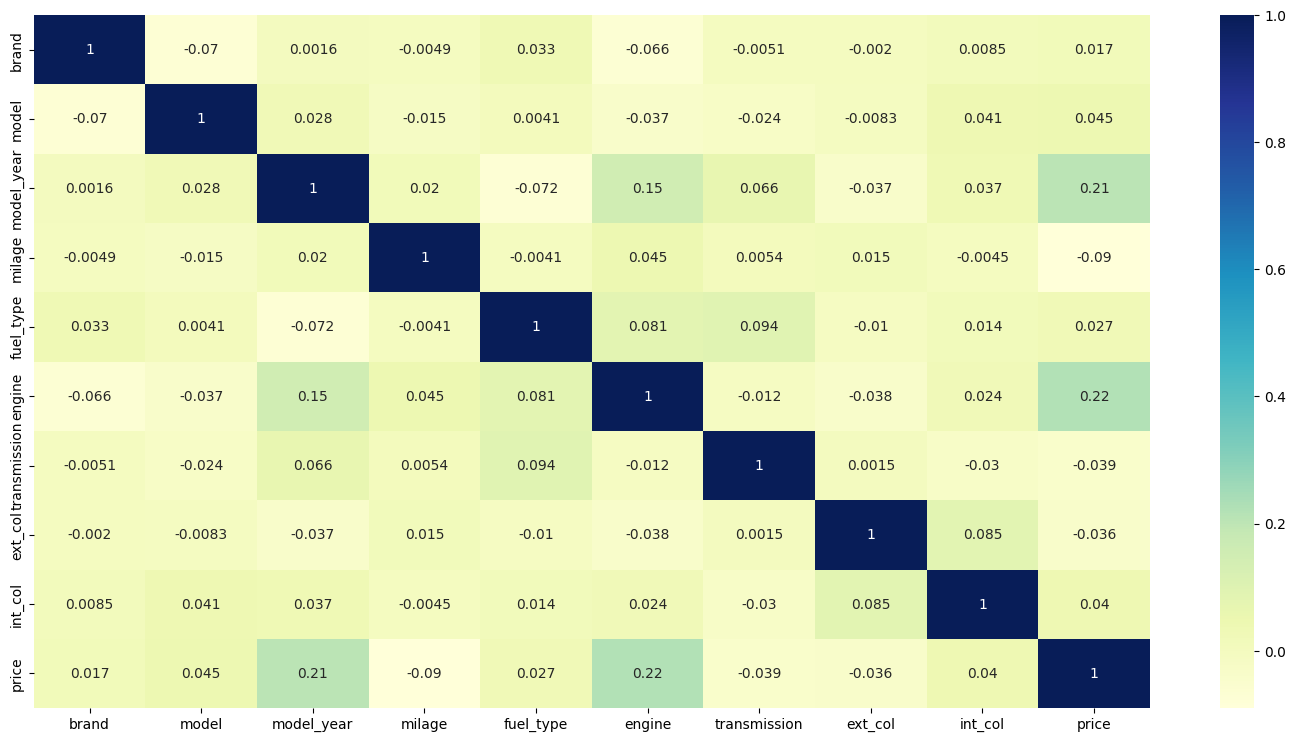

In [190]:
plt.figure(figsize=(18, 9))
sns.heatmap(car.corr(), annot=True, cmap='YlGnBu')
plt.show()

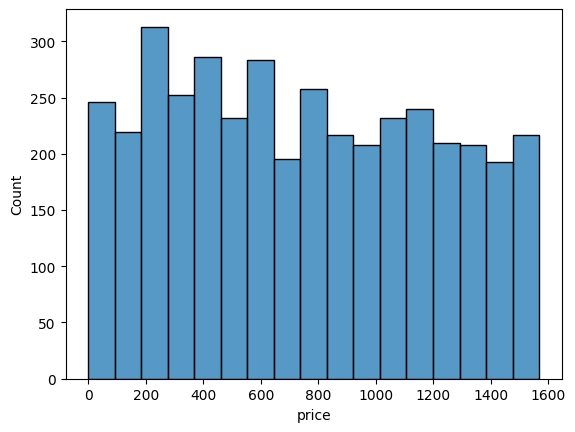

In [191]:
#to see the distribution of the price in the data
sns.histplot(data=car, x='price')

plt.show()

In [192]:
#what is the relationship between the numerical column and a categorical column in our data

grouping = car.groupby('brand')
grouping['price'].agg(['min', 'max', 'mean'])

,min,max,mean
brand,,,
0,2,1526,658.234375
1,358,1406,764.263158
2,224,1452,707.111111
3,11,1542,738.580000
4,11,1567,779.861333
5,28,1560,637.666667
6,1,1,1.000000
7,47,1234,511.866667
8,2,1558,685.149533


In [193]:
#what is the relationship between the categorical columns in our data

pd.crosstab(car['engine'], car['fuel_type'], normalize = 'index')

fuel_type,0,1,2,3,4,5,6
engine,,,,,,,
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1141,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1142,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1143,0.0,0.0,1.0,0.0,0.0,0.0,0.0


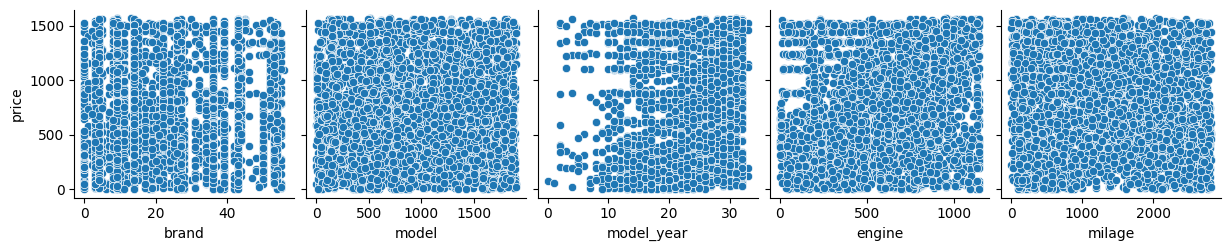

In [194]:
#scatter plot between Price and some input features
sns.pairplot(data=car,
            x_vars=['brand', 'model', 'model_year', 'engine', 'milage'],
            y_vars='price')

In [195]:
#feature scaling
from sklearn import preprocessing
n_test = car[['engine','milage',
                'model', 'ext_col','int_col','model_year','transmission','brand','fuel_type']]
cols_to_norm = ['engine','milage',
                'model', 'ext_col','int_col','model_year','transmission','brand','fuel_type']
x = n_test.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
n_test = pd.DataFrame(x_scaled, columns=cols_to_norm)
l_test = car.drop(['engine','milage',
                'model', 'ext_col','int_col','model_year','transmission','brand','fuel_type'], axis=1)
car = pd.concat([n_test, l_test], axis=1)
car.columns

Index(['engine', 'milage', 'model', 'ext_col', 'int_col', 'model_year',
       'transmission', 'brand', 'fuel_type', 'price'],
      dtype='object')

## Data preparation

In [196]:
#segregate our dataset into input and output
# Where X is our input variables
X = car.drop(columns=['price'])
# y is our target or ouput variable
y = car['price']
y.head()

,price
0,7
1,820
2,1164
3,208
4,748


In [197]:
# spit the data using train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)

(3006, 9)
(1003, 9)


## Train data using Random Forest *Regressor*





In [198]:
X.head()

,engine,milage,model,ext_col,int_col,model_year,transmission,brand,fuel_type
0,0.507424,0.668442,0.918819,0.091195,0.090323,0.666667,0.262295,0.250000,0.166667
1,0.494323,0.519702,0.623089,0.581761,0.458065,0.909091,0.524590,0.339286,0.333333
2,0.472489,0.370252,0.698471,0.119497,0.090323,0.939394,0.655738,0.482143,0.333333
3,0.632314,0.929002,0.654718,0.091195,0.090323,0.727273,0.377049,0.357143,0.500000
4,0.174672,0.944977,0.645756,0.377358,0.090323,0.909091,0.524590,0.053571,0.333333


In [199]:
# Import the algorithm Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# Initialize the Random Forest Regressor with a specified number of estimators
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


In [200]:
# Fit the model to the training data
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [201]:
# make predictions on the test set.
y_pred = rf_regressor.predict(X_test)


In [202]:
# evaluate the model's performance.
from sklearn import metrics
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  366.4533319552392


# 3. Automatic Feature Selection (RFE - Recursive Feature Elimination)

In [203]:
#importing the linear regression algorithm
from sklearn.linear_model import LinearRegression
regressor_temp = LinearRegression()

#importing the RFE feature selection
from sklearn.feature_selection import RFE
rfe = RFE(regressor_temp, n_features_to_select=7)
rfe = rfe.fit(X_train, y_train)

In [204]:
temp_df = pd.DataFrame({'Columns': X_train.columns,
                        'Included': rfe.support_,
                       'Ranking':rfe.ranking_})
temp_df

,Columns,Included,Ranking
0,engine,True,1
1,milage,True,1
2,model,True,1
3,ext_col,False,3
4,int_col,True,1
5,model_year,True,1
6,transmission,True,1
7,brand,False,2
8,fuel_type,True,1


In [205]:
# we will use the Random forest ensemble
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [206]:
predictions = model_rf.predict(X_test)
model_rf.feature_importances_

array([0.2482797 , 0.15841319, 0.13982665, 0.05143982, 0.03880653,
       0.20321429, 0.050402  , 0.08915323, 0.02046459])

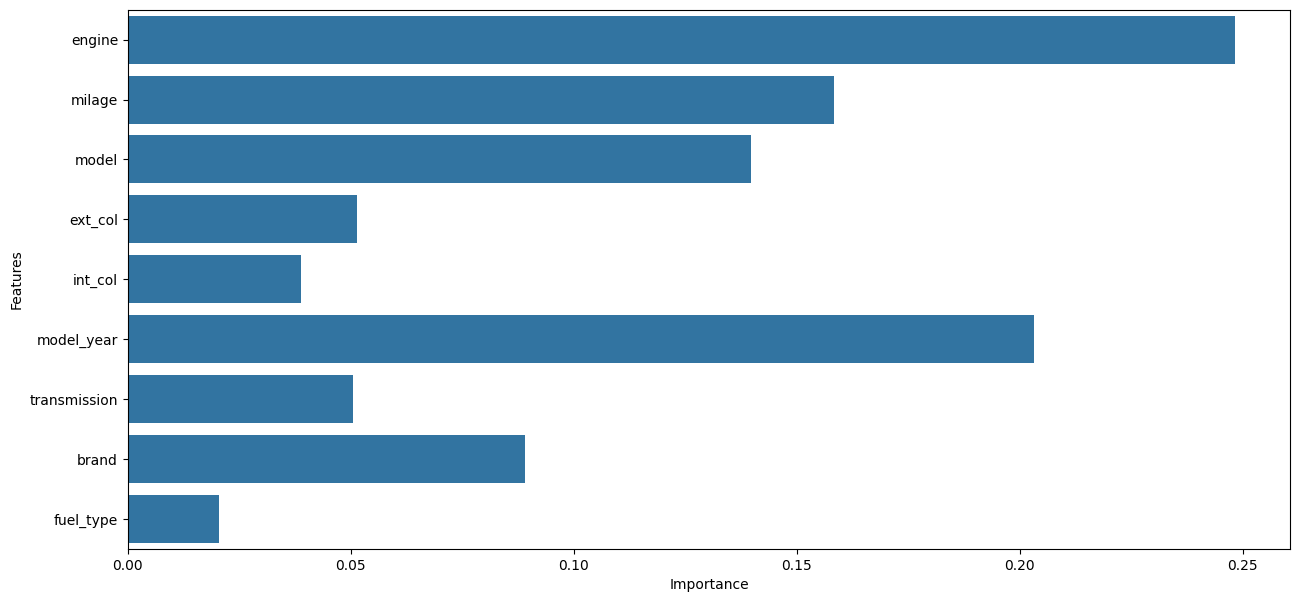

In [207]:
plt.figure(figsize=(15,7))
sns.barplot(x = model_rf.feature_importances_, y = X_train.columns,)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

**Interpretation and insights**

a. Significant Features:

- Engine (Engine performance and efficiency) and Model year (Manufacturing year of the vehicle for information about depreciation and technology advancement) have the highest importance scores.
- This suggests that these two features are the most influential in predicting the target variable (used car prices).

b. Less Important Features: Features like Fuel type (the type of fuel a vehicle run on), and Int_col (interior color of a vehicle)have very low importance scores. These features contribute minimally to the model's predictions.


c. Engine: This feature has the highest importance score, indicating that engine performance and efficiency is the most critical predictor in this model. This aligns with real-world expectations where the performance and efficiency of a used car strongly influences its price.

d. Model year: The manufacturing year of a vehicle is the second most important predictor, suggesting the high influence of depreciation and technological advancement on the target variable.

e. Other Features: Features like Model and Brand (Identify the vehicle and company name) also have moderate importance scores, indicating some influence on predictions.

f. Model Insight: The Random Forest model uses these importance scores to decide which features to split on when building decision trees. Features with higher importance scores often lead to significant reductions in prediction error.

g. Feature Selection: If you were to simplify the model, you might consider keeping only the most important features (e.g., engine, model year) and removing the less important ones (e.g., fuel type, Interior color) to reduce model complexity without significantly sacrificing accuracy.